In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
import plotly.express as px
import numpy as np
import plotly.graph_objects as go

In [87]:
file = 'rodent_data_with_neighborhoods.csv'
data = pd.read_csv(file)
data = pd.DataFrame(data)
print(data.columns)
data = data[['Neighborhood', 'White Alone %', 'Black/African-American %', 'Asian alone %', 'Hispanic %','Other Races %']]
data.head()

Index(['case_enquiry_id', 'open_dt', 'sla_target_dt', 'closed_dt', 'on_time',
       'case_status', 'closure_reason', 'case_title', 'subject', 'reason',
       'type', 'queue', 'department', 'submitted_photo', 'closed_photo',
       'location', 'fire_district', 'pwd_district', 'city_council_district',
       'police_district', 'neighborhood', 'neighborhood_services_district',
       'ward', 'precinct', 'location_street_name', 'location_zipcode',
       'latitude', 'longitude', 'geom_4326', 'source', 'Neighborhood',
       'Total Population', 'White Alone', 'White Alone %',
       'Black/African-American', 'Black/African-American %', 'Hispanic',
       'Hispanic %', 'Asian alone', 'Asian alone %', 'Other Races',
       'Other Races %',
       'Aggregate income in the past 12 months (in 2019 Inflation-adjusted dollars)',
       'Per Capita Income', 'Median Income', 'Total Families',
       'Married-couple family', 'Married-couple family %', 'Male householder',
       'Male householder %'

,Neighborhood,White Alone %,Black/African-American %,Asian alone %,Hispanic %,Other Races %
0,hyde park,22.4%,46.4%,2.0%,26.3%,3.0%
1,downtown,55.6%,4.0%,31.1%,6.0%,3.3%
2,dorchester,22.3%,44.0%,9.9%,19.9%,4.0%
3,west roxbury,67.4%,12.2%,7.5%,10.1%,2.9%
4,jamaica plain,55.1%,14.3%,4.9%,22.0%,3.7%


In [3]:
data['White Alone %'] = data['White Alone %'].str.replace('%', '').astype(float)
data['Black/African-American %'] = data['Black/African-American %'].str.replace('%', '').astype(float)
data['Hispanic %'] = data['Hispanic %'].str.replace('%', '').astype(float)
data['Asian alone %'] = data['Asian alone %'].str.replace('%', '').astype(float)
data['Other Races %'] = data['Other Races %'].str.replace('%', '').astype(float)


In [4]:
# Initialize an empty dictionary to store counts
count = {}

# Iterate over the unique neighborhoods and count occurrences
for neighborhood in data['Neighborhood'].unique():
    count[neighborhood] = (data['Neighborhood'] == neighborhood).sum()

#print(count)

race_dct = {}
white_lst = []
black_lst = []
asian_lst = []
hispanic_lst = []
other_lst = []
data = data.dropna(subset=['Neighborhood'])

for neighborhood in data['Neighborhood'].unique():
    subset = data.loc[data['Neighborhood'] == neighborhood]
    
    if subset.empty:  # Skip if no data for this neighborhood
        continue
    
    white = data.loc[data['Neighborhood'] == neighborhood, 'White Alone %'].values[0]
    black = data.loc[data['Neighborhood'] == neighborhood, 'Black/African-American %'].values[0]
    hispanic = data.loc[data['Neighborhood'] == neighborhood, 'Hispanic %'].values[0]
    asian = data.loc[data['Neighborhood'] == neighborhood, 'Asian alone %'].values[0]
    other = data.loc[data['Neighborhood'] == neighborhood, 'Other Races %'].values[0]
    
    white = (white / 100) * (count[neighborhood])
    black = (black / 100) * (count[neighborhood])
    hispanic = (hispanic / 100) * (count[neighborhood])
    asian = (asian / 100) * (count[neighborhood])
    other = (other / 100) * (count[neighborhood])
    
    white_lst.append(white)
    black_lst.append(black)
    hispanic_lst.append(hispanic)
    asian_lst.append(asian)
    other_lst.append(other)

race_dct['White'] = white_lst 
race_dct['Black'] = black_lst
race_dct['Hispanic'] = hispanic_lst
race_dct['Asian'] = asian_lst
race_dct['Other'] = other_lst

#race_dct

In [9]:
# make graph on only racial percentages, make graph with opacity for each race and rat numbers

### Racial Percentages Barchart

In [10]:
def population_plot(dct):
    # Prepare data for plotting
    neighborhoods = list(dct.keys())
    white_pct = [dct[nbhd].get('White', 0) for nbhd in neighborhoods]
    asian_pct = [dct[nbhd].get('Asian', 0) for nbhd in neighborhoods]
    hispanic_pct = [dct[nbhd].get('Hispanic', 0) for nbhd in neighborhoods]
    black_pct = [dct[nbhd].get('Black', 0) for nbhd in neighborhoods]
    other_pct = [dct[nbhd].get('Other', 0) for nbhd in neighborhoods]
    
    # Position of the bars on the x-axis
    x = np.arange(len(neighborhoods))
    
    # Plotting
    plt.figure(figsize=(15, 8), dpi=400)
    bar_width = 0.85
    
    # Stacked bar chart
    plt.bar(x, white_pct, color='tan', width=bar_width, label='White')
    plt.bar(x, asian_pct, bottom=white_pct, color='palevioletred', width=bar_width, 
            label='Asian')
    plt.bar(x, hispanic_pct, bottom=np.array(white_pct) + np.array(asian_pct), 
            color='pink', width=bar_width, label='Hispanic')
    plt.bar(x, black_pct, bottom=np.array(white_pct) + np.array(asian_pct) + 
            np.array(hispanic_pct), color='dimgray', width=bar_width, 
            label='Black')
    plt.bar(x, other_pct, bottom=np.array(white_pct) + np.array(asian_pct) + 
            np.array(hispanic_pct) + np.array(black_pct), color='lightgray', width=bar_width, 
            label='Other')
    
    # Labels and title
    plt.xlabel("Neighborhood")
    plt.ylabel("Population Percentage")
    plt.title("Racial Composition by Neighborhood")
    plt.xticks(x, neighborhoods, rotation=90)
    plt.yticks(np.arange(0, 110, step=10))
    plt.grid(axis='y')
    plt.legend()
    
    plt.tight_layout()
    plt.savefig("race_percentages.png")
    plt.show()

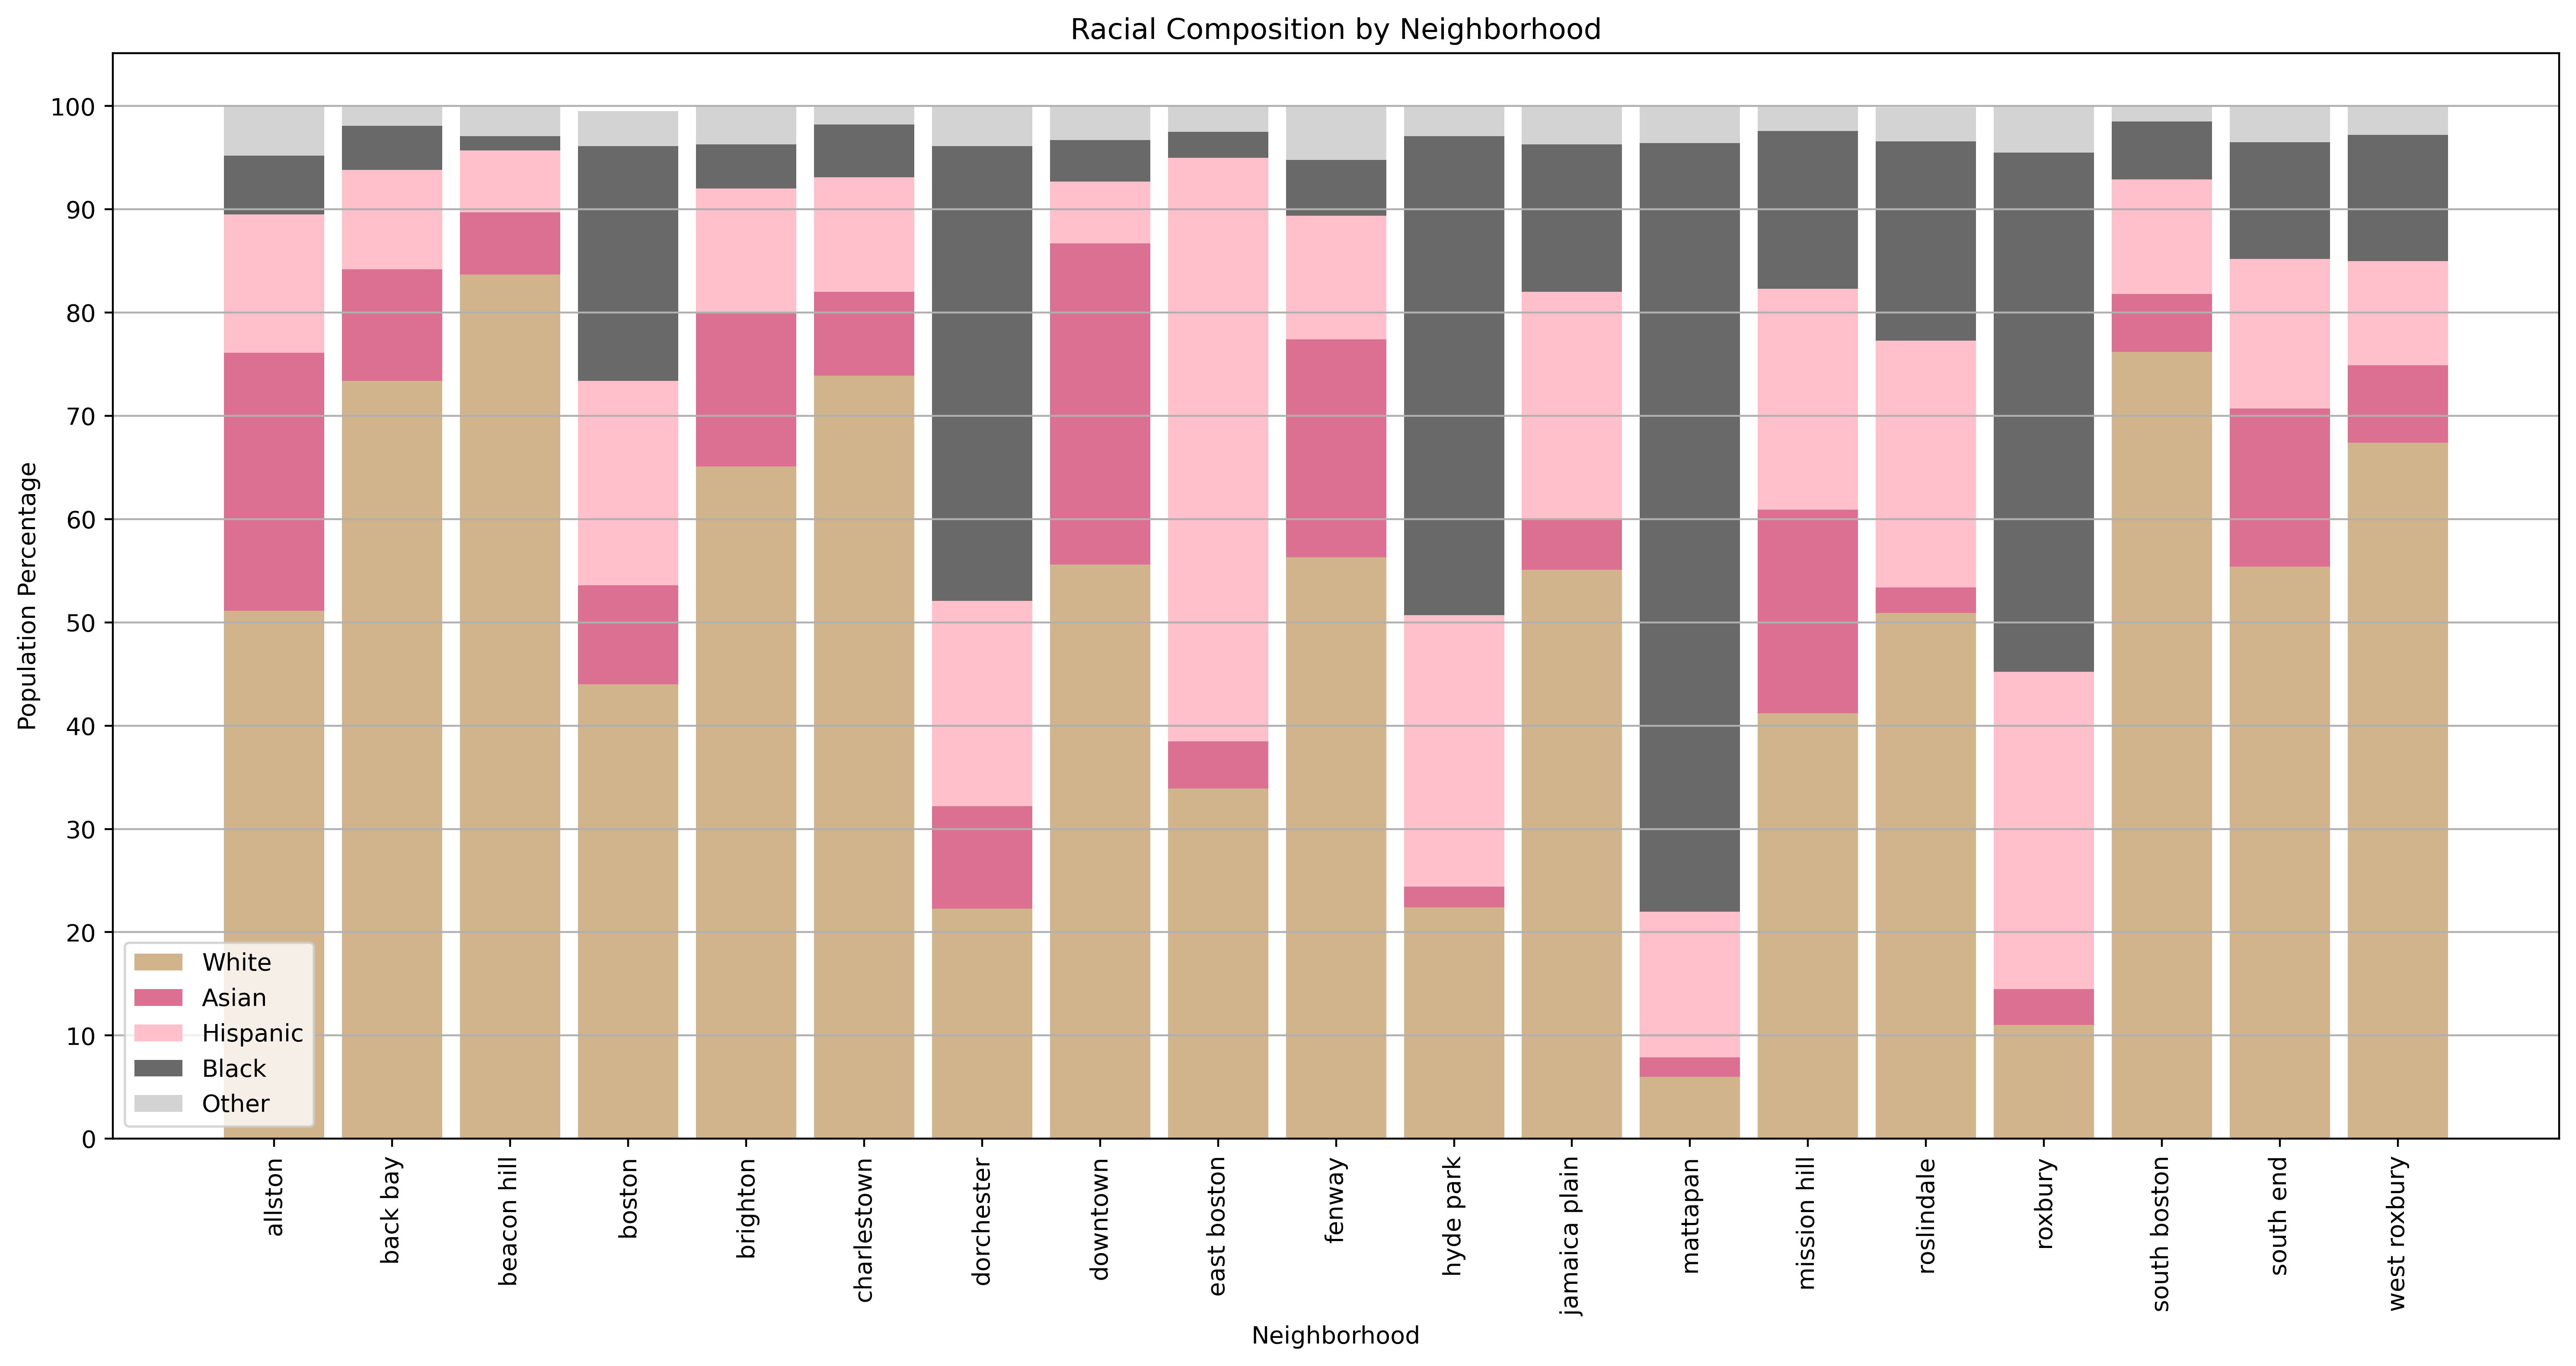

In [11]:
file = 'rodent_data_with_neighborhoods.csv'
data = pd.read_csv(file)
data = data[['Neighborhood', 'White Alone %', 'Black/African-American %', 'Asian alone %', 'Hispanic %','Other Races %']]

data['White Alone %'] = data['White Alone %'].str.replace('%', '').astype(float)
data['Black/African-American %'] = data['Black/African-American %'].str.replace('%', '').astype(float)
data['Hispanic %'] = data['Hispanic %'].str.replace('%', '').astype(float)
data['Asian alone %'] = data['Asian alone %'].str.replace('%', '').astype(float)
data['Other Races %'] = data['Other Races %'].str.replace('%', '').astype(float)

# Rename columns to match the expected dictionary keys
data = data.rename(columns={
    'White Alone %': 'White',
    'Black/African-American %': 'Black',
    'Asian alone %': 'Asian',
    'Hispanic %': 'Hispanic',
    'Other Races %': 'Other'
})
# Group by 'Neighborhood' and take the mean percentage for each race
data = data.groupby('Neighborhood', as_index=False).mean()

# Convert DataFrame to a dictionary of dictionaries
race_dct = data.set_index('Neighborhood').to_dict(orient='index')

population_plot(race_dct)

## INTERACTIVE

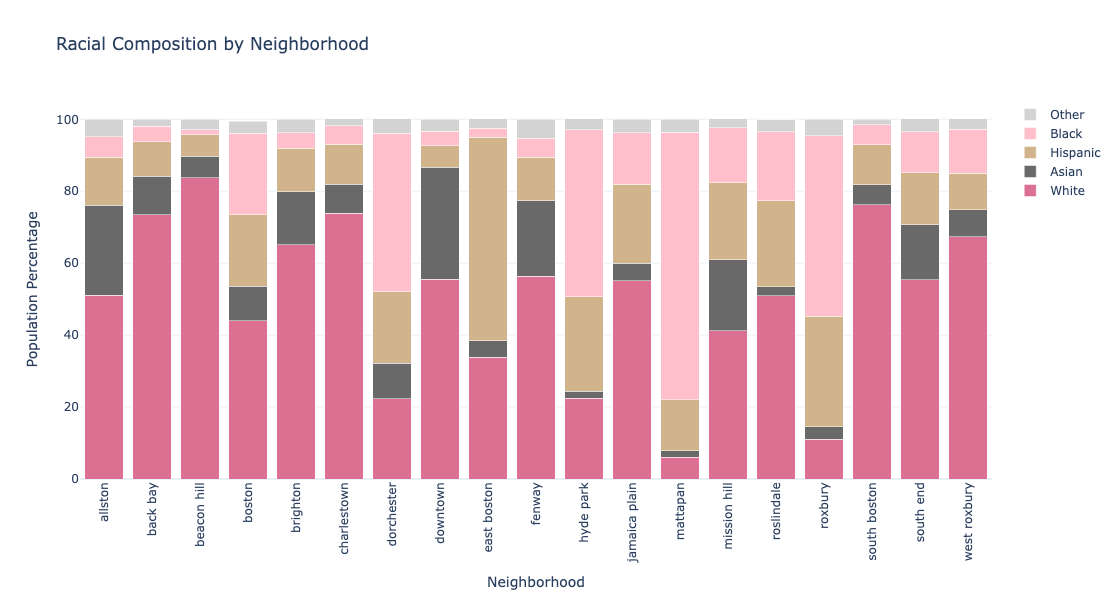

In [39]:
import pandas as pd
import plotly.graph_objects as go

def population_plot_interactive(dct):
    # Prepare data for plotting
    neighborhoods = list(dct.keys())
    white_pct = [dct[nbhd].get('White', 0) for nbhd in neighborhoods]
    asian_pct = [dct[nbhd].get('Asian', 0) for nbhd in neighborhoods]
    hispanic_pct = [dct[nbhd].get('Hispanic', 0) for nbhd in neighborhoods]
    black_pct = [dct[nbhd].get('Black', 0) for nbhd in neighborhoods]
    other_pct = [dct[nbhd].get('Other', 0) for nbhd in neighborhoods]

    # Create a figure
    fig = go.Figure()

    # Add traces for each race group
    fig.add_trace(go.Bar(
        x=neighborhoods,
        y=white_pct,
        name='White',
        marker_color='palevioletred'
    ))

    fig.add_trace(go.Bar(
        x=neighborhoods,
        y=asian_pct,
        name='Asian',
        marker_color='dimgray'
    ))

    fig.add_trace(go.Bar(
        x=neighborhoods,
        y=hispanic_pct,
        name='Hispanic',
        marker_color='tan'
    ))

    fig.add_trace(go.Bar(
        x=neighborhoods,
        y=black_pct,
        name='Black',
        marker_color='pink'
    ))

    fig.add_trace(go.Bar(
        x=neighborhoods,
        y=other_pct,
        name='Other',
        marker_color='lightgray'
    ))

    # Update layout
    fig.update_layout(
        barmode='stack',
        title="Racial Composition by Neighborhood",
        xaxis_title="Neighborhood",
        yaxis_title="Population Percentage",
        xaxis_tickangle=-90,
        width = 1000,
        height = 600,
        template="plotly_white",
        showlegend=True
    )

    # Show the plot
    fig.show()
    return fig

# Load and process data
file = 'rodent_data_with_neighborhoods.csv'
data = pd.read_csv(file)
data = data[['Neighborhood', 'White Alone %', 'Black/African-American %', 'Asian alone %', 'Hispanic %', 'Other Races %']]

# Remove '%' sign and convert to float
data['White Alone %'] = data['White Alone %'].str.replace('%', '').astype(float)
data['Black/African-American %'] = data['Black/African-American %'].str.replace('%', '').astype(float)
data['Hispanic %'] = data['Hispanic %'].str.replace('%', '').astype(float)
data['Asian alone %'] = data['Asian alone %'].str.replace('%', '').astype(float)
data['Other Races %'] = data['Other Races %'].str.replace('%', '').astype(float)

# Rename columns for better clarity
data = data.rename(columns={
    'White Alone %': 'White',
    'Black/African-American %': 'Black',
    'Asian alone %': 'Asian',
    'Hispanic %': 'Hispanic',
    'Other Races %': 'Other'
})

# Group by 'Neighborhood' and take the mean for each race
data = data.groupby('Neighborhood', as_index=False).mean()

# Convert to dictionary of dictionaries
race_dct = data.set_index('Neighborhood').to_dict(orient='index')

# Call the interactive plotting function
plot = population_plot_interactive(race_dct)
plot

plot.write_html('racial_composition_bar.html')

### Each Race Graphs

In [100]:
file = 'rodetn_data_demographics.csv'
data = pd.read_csv(file)
data = pd.DataFrame(data)
data = data[['Neighborhood', 'White Alone %', 'Black/African-American %', 'Asian alone %', 'Hispanic %','Other Races %']]

data['White Alone %'] = data['White Alone %'].str.replace('%', '').astype(float)
data['Black/African-American %'] = data['Black/African-American %'].str.replace('%', '').astype(float)
data['Hispanic %'] = data['Hispanic %'].str.replace('%', '').astype(float)
data['Asian alone %'] = data['Asian alone %'].str.replace('%', '').astype(float)
data['Other Races %'] = data['Other Races %'].str.replace('%', '').astype(float)

data.head()

,Neighborhood,White Alone %,Black/African-American %,Asian alone %,Hispanic %,Other Races %
0,hyde park,22.4,46.4,2.0,26.3,3.0
1,downtown,55.6,4.0,31.1,6.0,3.3
2,dorchester,22.3,44.0,9.9,19.9,4.0
3,west roxbury,67.4,12.2,7.5,10.1,2.9
4,jamaica plain,55.1,14.3,4.9,22.0,3.7


In [101]:
def three_highest(data, race_col):
    """ Find the three highest and lowest percentages within a race column. """
    # Create dictionary of neighborhood and race
    dct = {}
    for _, row in data.iterrows():
        dct[row['Neighborhood']] = row[race_col]
        
    # Find three higest values    
    top_three = sorted(dct.items(), key=lambda x: x[1], reverse=True)[:3]

    return top_three
    
def three_lowest(data, race_col):
    """ Find the three highest percentages within a race column. """
    # Create dictionary of neighborhood and race
    dct = {}
    for _, row in data.iterrows():
        dct[row['Neighborhood']] = row[race_col]
        
    # Find three higest values    
    bottom_three = sorted(dct.items(), key=lambda x: x[1])[:3]

    return bottom_three

    plot
    

In [102]:
def plot_aggregates(highest, lowest, data, race):
    """ Function takes highest and lowest neighborhoods for given percentage. Plots the aggregate
    number of rat sightings for each group."""
    
    high_count = 0
    for neighborhood in highest[0]:
        for row in data['Neighborhood']:
            if row == neighborhood:
                high_count += 1
    
    low_count = 0
    for neighborhood in lowest[0]:
        for row in data['Neighborhood']:
            if row == neighborhood:
                low_count += 1

    # Plot
    plt.figure(figsize=(6, 4), dpi=200)
    plt.bar([f"Highest % {race}", f"Lowest % {race}"], [high_count, low_count], 
            color=['dimgray', 'dimgray'])

    plt.xlabel("Neighborhood Groups")
    plt.ylabel("Number of Rat Sightings")
    plt.title(f"Rat Sightings in Highest vs Lowest {race} Percentage Neighborhoods")
    plt.savefig(f'./sightings racial top 3 bottom 3/sightings_by_high_low_{race}.png', bbox_inches='tight')
    plt.show()
    

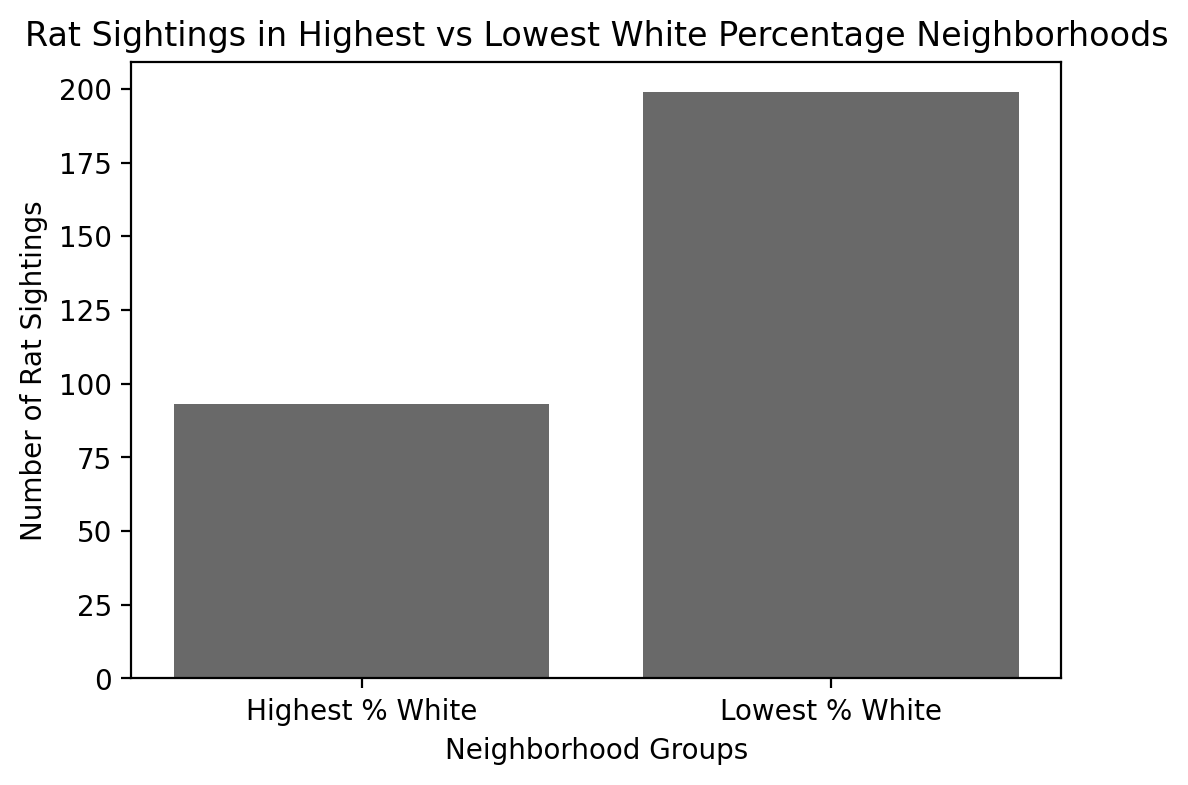

In [103]:
white_high = three_highest(data, 'White Alone %')
white_low = three_lowest(data, 'White Alone %')
plot_aggregates(white_high, white_low, data, 'White')

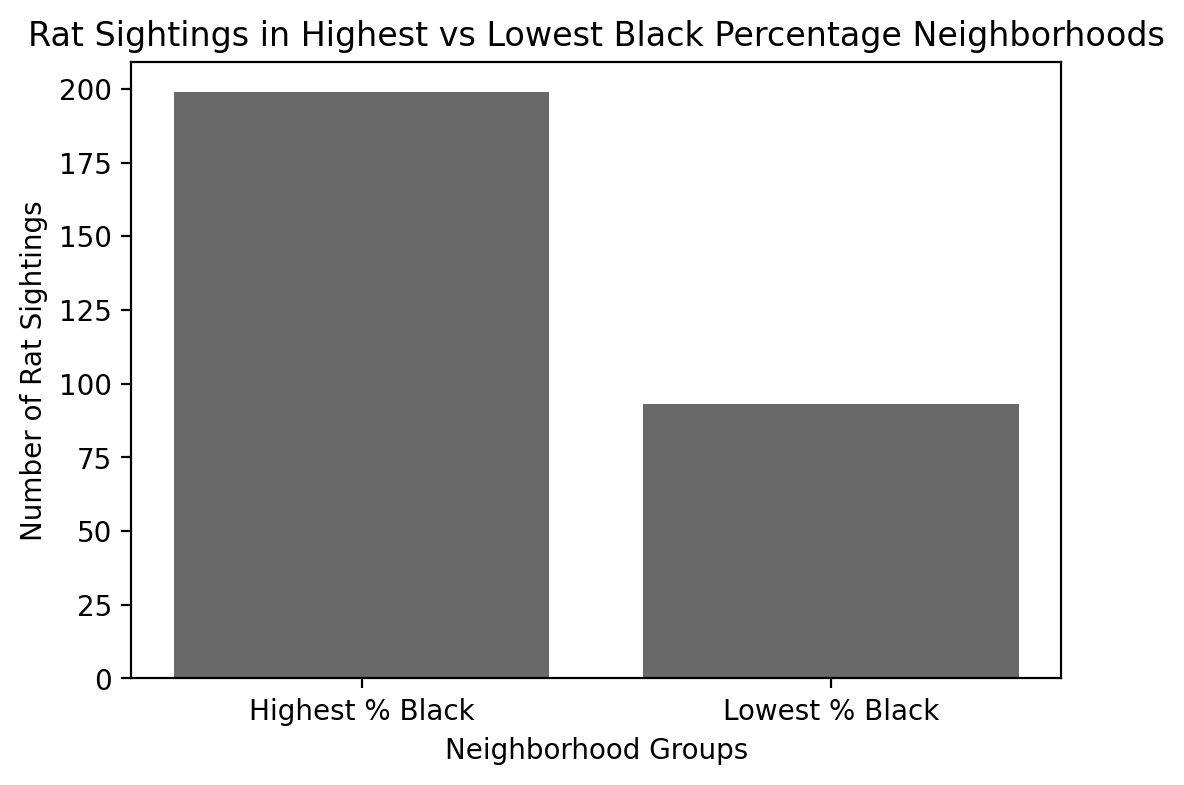

In [104]:
black_high = three_highest(data, 'Black/African-American %')
black_low = three_lowest(data, 'Black/African-American %')
plot_aggregates(black_high, black_low, data, 'Black')

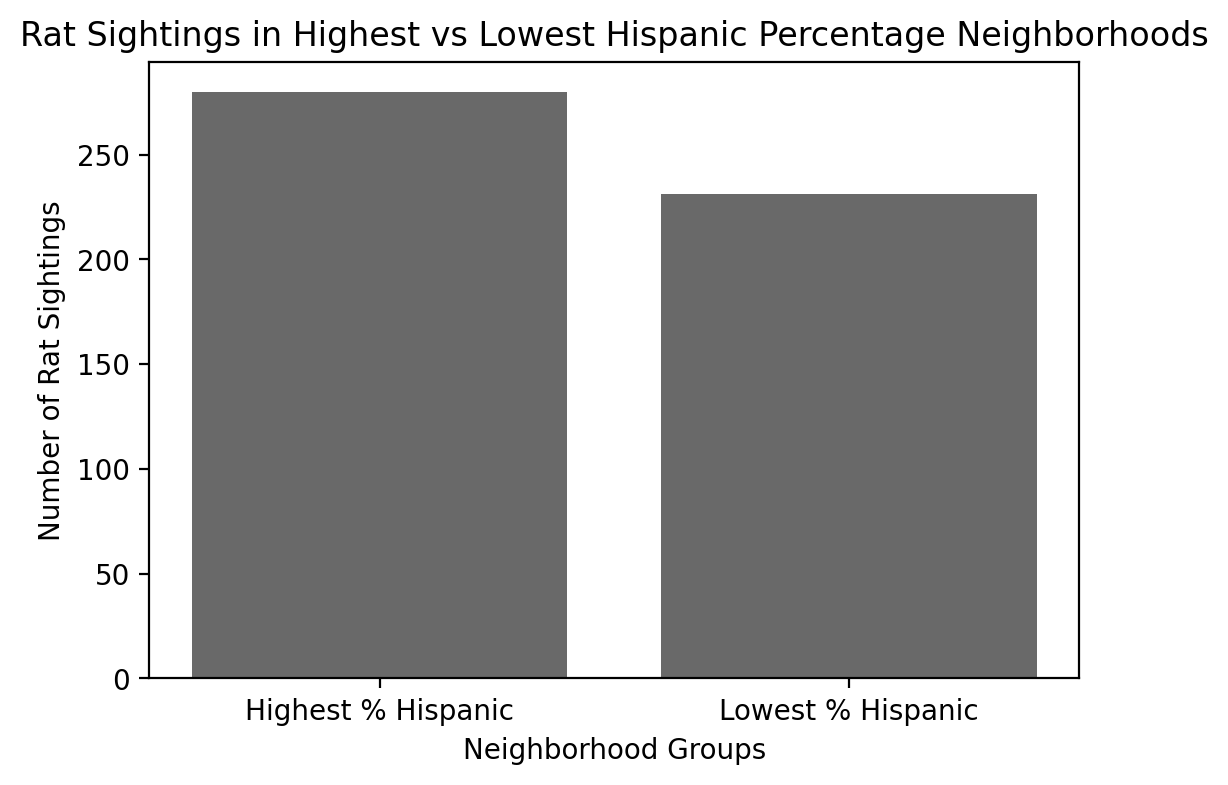

In [105]:
hispanic_high = three_highest(data, 'Hispanic %')
hispanic_low = three_lowest(data, 'Hispanic %')
plot_aggregates(hispanic_high, hispanic_low, data, 'Hispanic')

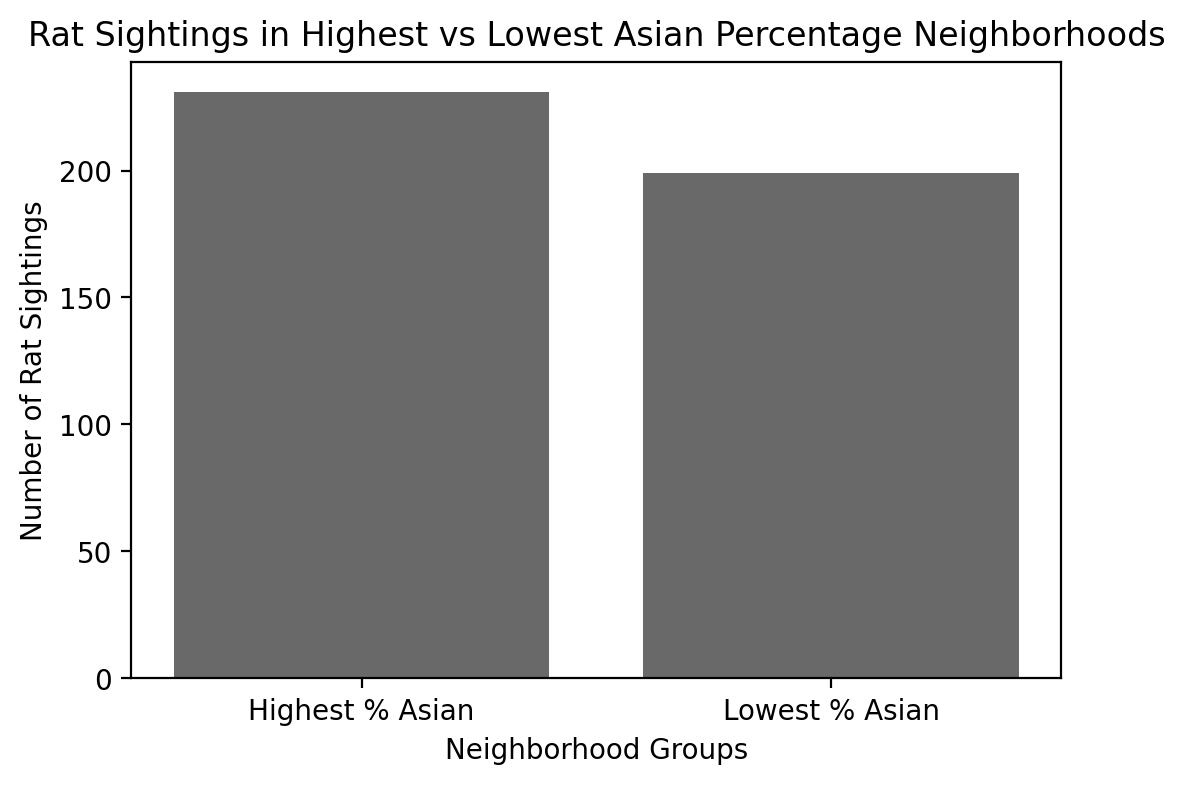

In [106]:
asian_high = three_highest(data, 'Asian alone %')
asian_low = three_lowest(data, 'Asian alone %')
plot_aggregates(asian_high, asian_low, data, 'Asian')